In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk

In [ ]:
import zipfile
import pandas as pd

# Download the dataset from Kaggle first (manually or using Kaggle API)
# Then unzip it:
with zipfile.ZipFile('/content/IMDB Dataset.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

 1. **Install & Import Required Libraries**

In [ ]:
# Install required NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

# Set visualization style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Configuration
RANDOM_STATE = 42
TEST_SIZE = 0.2
MAX_FEATURES = 5000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<Figure size 1000x600 with 0 Axes>

 2. Load Dataset


In [ ]:
# Load CSV
def load_data(filepath):
    try:
        df = pd.read_csv(filepath)
        print("✅ Dataset loaded successfully!")
        return df
    except FileNotFoundError:
        print("❌ File not found. Please check the file path.")
        return None

# Load IMDb dataset
df = load_data('/content/IMDB Dataset.csv')  # Change path if needed


✅ Dataset loaded successfully!


 2.1 Explore Dataset



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

🔍 First 5 samples:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

📈 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


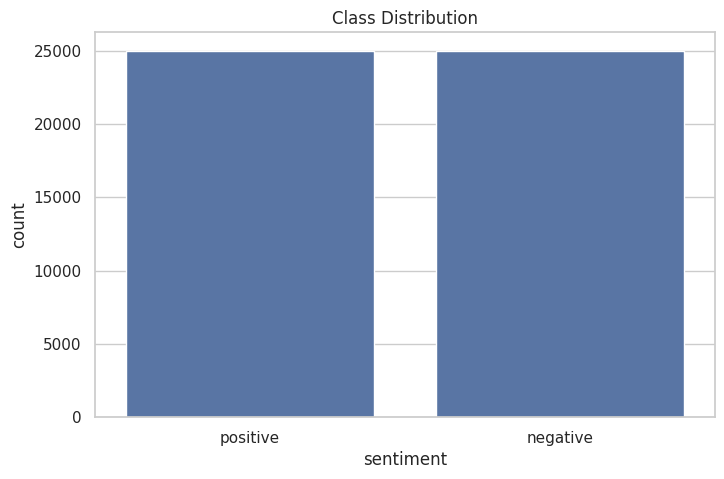

In [ ]:
# Explore the dataset
def explore_data(df):
    print("\n📊 Dataset Info:")
    print(df.info())

    print("\n🔍 First 5 samples:")
    print(df.head())

    print("\n📈 Sentiment Distribution:")
    print(df['sentiment'].value_counts())

    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='sentiment')
    plt.title("Class Distribution")
    plt.show()

explore_data(df)


 3. Text Preprocessing

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

print("\n🧹 Preprocessing text data...")
df['processed_review'] = df['review'].apply(preprocess_text)



🧹 Preprocessing text data...


 4. Feature Engineering

In [ ]:
# Convert sentiment to binary
df['sentiment_binary'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Train-test split
X = df['processed_review']
y = df['sentiment_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# TF-IDF Vectorization
print("\n🔡 Vectorizing text features...")
tfidf = TfidfVectorizer(max_features=MAX_FEATURES)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



🔡 Vectorizing text features...


5. Model Training and Evaluation


🏋️ Training Logistic Regression model...

📊 Logistic Regression Performance:
Accuracy: 0.8847

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



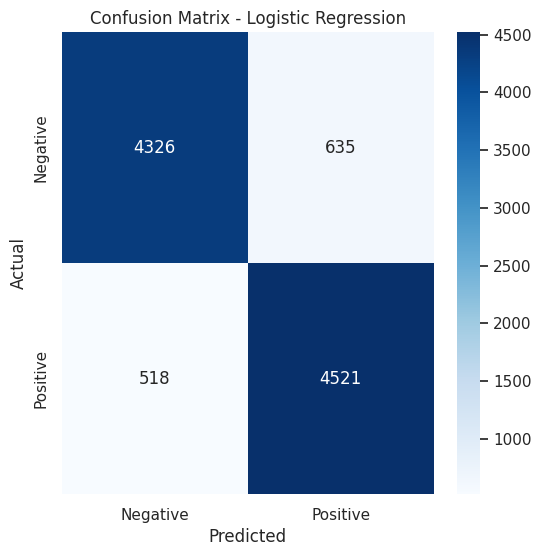


🏋️ Training Naive Bayes model...

📊 Naive Bayes Performance:
Accuracy: 0.8518

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



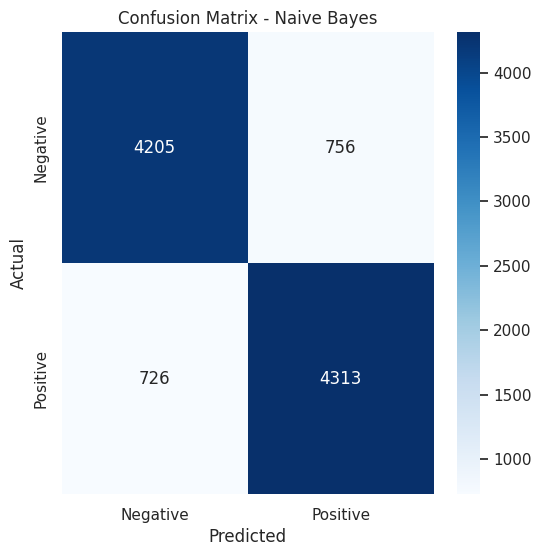

In [ ]:
# Training & evaluation function
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n🏋️ Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return model

# Train Logistic Regression
lr_model = train_and_evaluate(LogisticRegression(max_iter=1000),
                              X_train_tfidf, y_train,
                              X_test_tfidf, y_test,
                              "Logistic Regression")

# Train Naive Bayes
nb_model = train_and_evaluate(MultinomialNB(),
                              X_train_tfidf, y_train,
                              X_test_tfidf, y_test,
                              "Naive Bayes")


 6. Visualize Most Important Words

/tmp/ipython-input-2796086469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_weights, y=pos_words, ax=axes[0], palette='Greens_d')
/tmp/ipython-input-2796086469.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_weights, y=neg_words, ax=axes[1], palette='Reds_d')


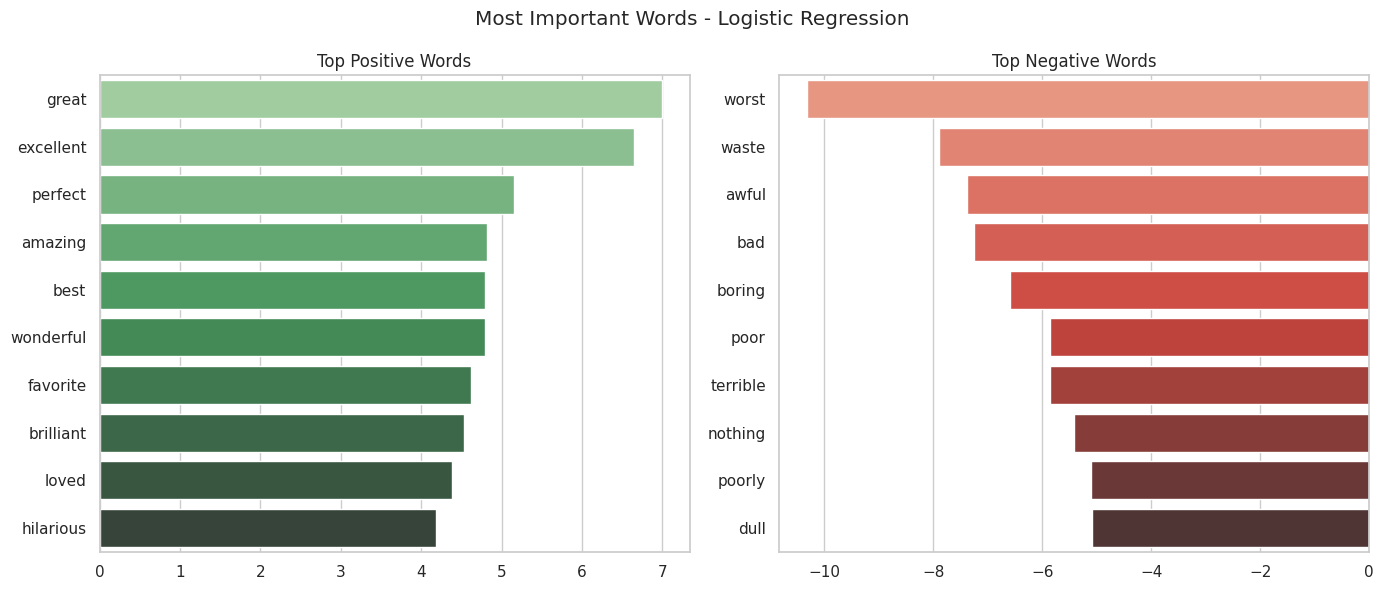

/tmp/ipython-input-2796086469.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_weights, y=pos_words, ax=axes[0], palette='Greens_d')
/tmp/ipython-input-2796086469.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neg_weights, y=neg_words, ax=axes[1], palette='Reds_d')


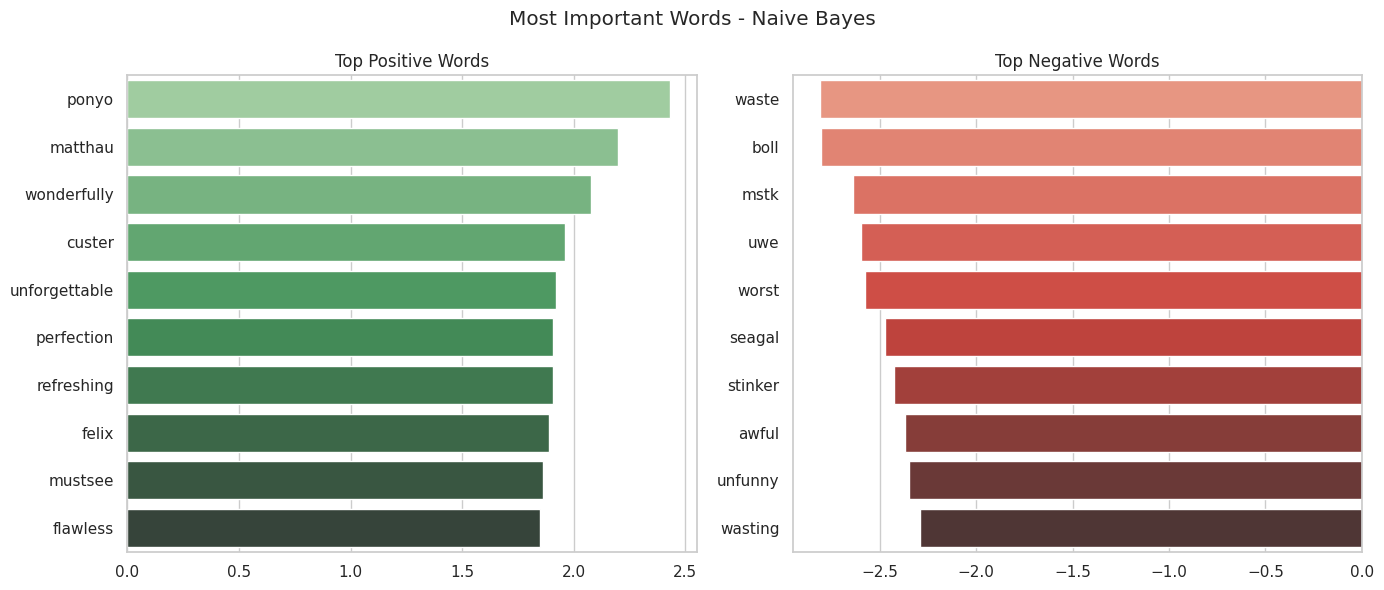

In [ ]:
# Visualization function
def visualize_important_words(model, feature_names, n_words=10, title=None):
    if hasattr(model, 'coef_'):
        coef = model.coef_[0]
    else:
        coef = model.feature_log_prob_[1] - model.feature_log_prob_[0]

    top_positive = sorted(zip(coef, feature_names), reverse=True)[:n_words]
    top_negative = sorted(zip(coef, feature_names))[:n_words]

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    pos_words = [word for _, word in top_positive]
    pos_weights = [weight for weight, _ in top_positive]
    sns.barplot(x=pos_weights, y=pos_words, ax=axes[0], palette='Greens_d')
    axes[0].set_title('Top Positive Words')

    neg_words = [word for _, word in top_negative]
    neg_weights = [weight for weight, _ in top_negative]
    sns.barplot(x=neg_weights, y=neg_words, ax=axes[1], palette='Reds_d')
    axes[1].set_title('Top Negative Words')

    if title:
        fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Get feature names from TF-IDF
feature_names = tfidf.get_feature_names_out()

# Visualize important words
visualize_important_words(lr_model, feature_names, title='Most Important Words - Logistic Regression')
visualize_important_words(nb_model, feature_names, title='Most Important Words - Naive Bayes')


 7. Final Message

In [ ]:
print(" Sentiment analysis complete!")


 Sentiment analysis complete!
